In [1]:
import numpy as np
import cv2 as cv
import csv
from matplotlib import pyplot as plt  

In [2]:
import task_1b


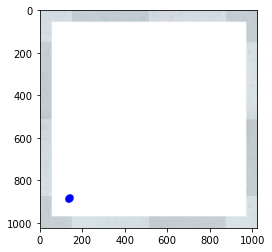

In [3]:
input_img = cv.imread("shot2.png",1)
plt.imshow(input_img)
plt.show()


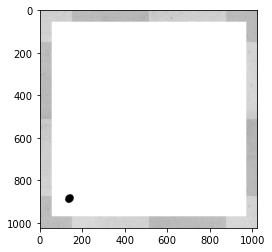

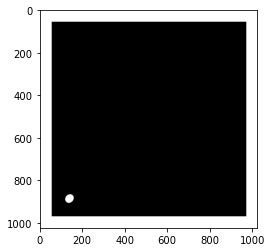

In [4]:
gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
ret,thresh1 = cv.threshold(gray,230,255,cv.THRESH_BINARY_INV)
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(thresh1,cmap="gray")
plt.show()

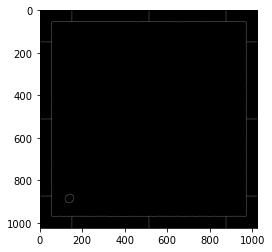

In [5]:
edged = cv.Canny(gray, 50, 200)
plt.imshow(edged,cmap="gray")
plt.show()

In [6]:
cnts = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]

In [15]:
cnts = sorted(cnts, key = cv.contourArea, reverse = True)
for c in cnts:
		peri = cv.arcLength(c, True)
		approx = cv.approxPolyDP(c, 0.05 * peri, True)
		#0.02
		
	# If length is 4 then it is ROI
		if len(approx) == 4:
			screenCnt = approx
			break
pts = screenCnt.reshape(4, 2)

	#creating Array of Zero of Size(4,2)	
rect = np.zeros((4, 2), dtype = "float32")

	#Ordering of points in Clockwise manner

s = pts.sum(axis = 1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis = 1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]
(tl, tr, br, bl) = rect


	#Finding Maximum width

maxWidth =1280



	#Findinf Maximum height


maxHeight = 1280

	#Destination Array of ROI
	

dst = np.array([[0, 0],[maxWidth - 1, 0],[maxWidth - 1, maxHeight - 1],[0, maxHeight - 1]], dtype = "float32")


	#Applying perspective transform
M = cv.getPerspectiveTransform(rect, dst)

	# Finally the warped image 
warped_img = cv.warpPerspective(input_img, M, (maxWidth, maxHeight))

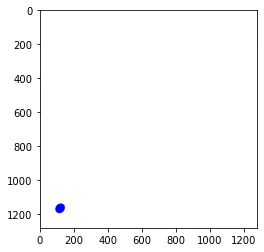

In [16]:
plt.imshow(warped_img)
plt.show()